# Визуализация

In [1]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns

In [2]:
df = pd.read_csv('dfMoscow7Cls.csv')
# df = df.drop(['Unnamed: 0'], axis = 1)

In [3]:
df

,Адрес,Район,Кол-во ДТП по данному адресу,Отношение кол-ва ДТП по данному адресу ко всем ДТП в Москве,Легкий,Тяжёлый,С погибшими,Иной вид ДТП,Наезд на велосипедиста,Наезд на пешехода,...,Наезд на стоящее ТС,Опрокидывание,Падение пассажира,Столкновение,Съезд с дороги,Широта,Долгота,Среднее значение тяжести,Индекс,Класс опасности
0,"г Москва, Московская кольцевая автомобильная д...",Чертаново Южное,14,0.000133,9,5,0,0,0,0,...,3,0,0,11,0,55.579467,37.583253,1.357143,19,2
1,"г Москва, ш Ярославское, 1",Ярославский,10,0.000095,100,13,6,0,1,24,...,2,2,8,66,0,55.871109,37.711612,1.210084,12,2
2,"г Москва, Московская кольцевая автомобильная д...",Восточное Измайлово,22,0.000210,17,3,2,2,0,1,...,6,0,1,9,0,55.800340,37.839965,1.318182,29,3
3,"г Москва, Московская кольцевая автомобильная д...",Строгино,20,0.000191,16,4,0,0,0,0,...,3,0,0,16,0,55.797798,37.380348,1.200000,24,2
4,"г Москва, ш Носовихинское, 1км",Новокосино,6,0.000057,5,0,1,0,0,0,...,1,0,0,4,0,55.744075,37.843950,1.333333,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,"г Балашиха, ул Звездная, 4",Балашиха,6,0.000057,4,2,0,0,1,5,...,0,0,0,0,0,55.821261,37.835578,1.333333,8,1
4077,"г Балашиха, А-103 Щелковское шоссе Москва - Ще...",Балашиха,10,0.000095,5,5,0,0,0,3,...,0,0,1,6,0,55.825600,37.890800,1.500000,15,2
4078,"г Балашиха, ул Текстильщиков, 15",Балашиха,7,0.000067,4,3,0,0,0,1,...,0,0,0,6,0,55.812436,37.965840,1.428571,10,1
4079,"г Балашиха, MКАД-ЖЕЛЕЗНОДОРОЖНЫЙ-ЛИКИНО-ДУЛЕВО...",Балашиха,8,0.000076,3,4,1,0,0,2,...,1,0,0,5,0,55.753091,38.096150,1.750000,14,2


In [4]:
df2 = df.groupby(['Район']).size().reset_index(name='Кол-во ДТП в рейоне')
df2 = df2.sort_values('Кол-во ДТП в рейоне').reset_index()
df2 = df2.tail(10)

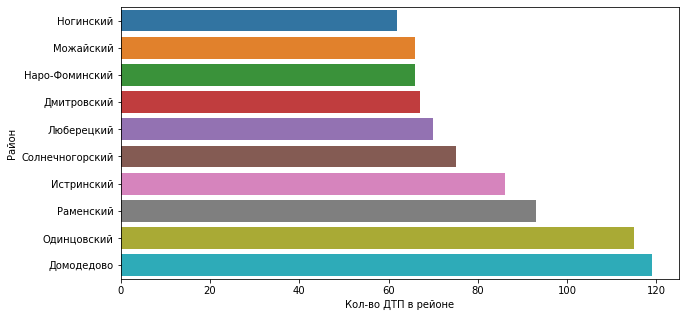

In [5]:
y = df2['Район']
x = df2['Кол-во ДТП в рейоне']
dims = (10, 5)
fig, ax = pyplot.subplots(figsize=dims)
sns.barplot(ax=ax, x=x, y=y)

In [6]:
df = pd.read_csv('dfMoscow.csv')
df = df.drop(['Unnamed: 0'], axis = 1)

In [7]:
df_severity = df.groupby(['properties.severity']).size().reset_index(name='Кол-во ДТП')
df_severity

,properties.severity,Кол-во ДТП
0,Легкий,64066
1,С погибшими,9794
2,Тяжёлый,38688


([<matplotlib.patches.Wedge at 0x25c77c08b50>,
 [Text(-1.0740837452425112, -0.23736913911842178, 'Легкий'),
  Text(1.0982828809778464, -0.06143869587647337, 'Тяжёлый'),
  Text(0.3239888052847348, 1.1554355257002316, 'С погибшими')],
 [Text(-0.5858638610413697, -0.12947407588277549, '56.9%'),
  Text(0.5990633896242799, -0.03351201593262183, '34.4%'),
  Text(0.18899346974942863, 0.6740040566584683, '8.7%')])

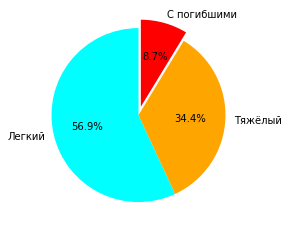

In [8]:
df1 = pd.DataFrame(df['properties.severity'].value_counts().reset_index())
explode = (0, 0, 0.1)
colors = ( "cyan", "orange", "red") 
pyplot.pie(data=df1,x='properties.severity',labels='index', autopct='%.1f%%', explode=explode, startangle=90, colors = colors)

In [9]:
category = ['Иной вид ДТП', 'Съезд с дороги', 'Опрокидывание', 'Наезд на велосипедиста', 'Падение пассажира', 'Наезд на стоящее ТС', 'Наезд на препятствие', 'Наезд на пешехода', 'Столкновение']
for i in range(0, len(df['properties.category'])):
    if df.loc[i]['properties.category'] not in category:
        df.at[i, 'properties.category'] = 'Иной вид ДТП'

In [10]:
df2 = df.groupby(['properties.category']).size().reset_index(name='Кол-во ДТП')
df2.sort_values(by='Кол-во ДТП')

,properties.category,Кол-во ДТП
0,Иной вид ДТП,612
8,Съезд с дороги,1251
5,Опрокидывание,2674
1,Наезд на велосипедиста,3422
6,Падение пассажира,3642
4,Наезд на стоящее ТС,4872
3,Наезд на препятствие,7443
2,Наезд на пешехода,37765
7,Столкновение,50867


In [11]:
df_cat = df.groupby(['properties.category']).size().reset_index(name='Кол-во ДТП')
df_cat = df_cat.sort_values(by ='Кол-во ДТП')

In [12]:
df_cat = df_cat.tail(9)

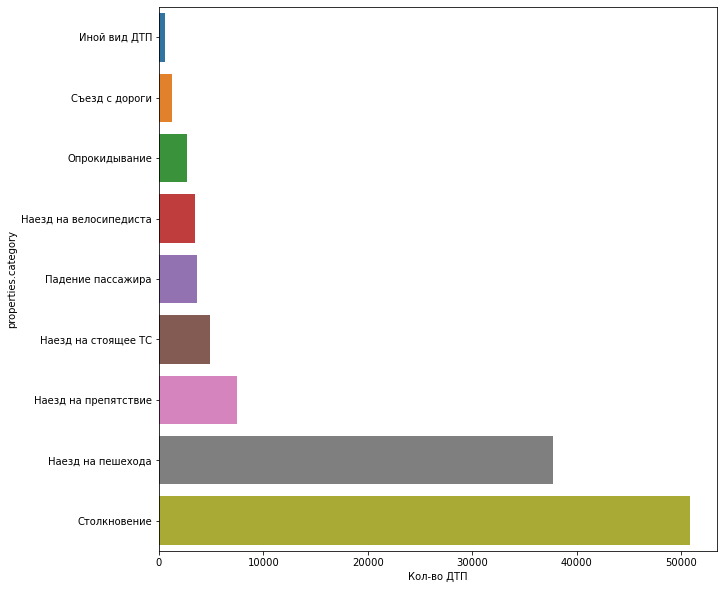

In [13]:
y = df_cat['properties.category']
x = df_cat['Кол-во ДТП']
dims = (10, 10)
fig, ax = pyplot.subplots(figsize=dims)
sns.barplot(x=x, y=y)

([<matplotlib.patches.Wedge at 0x25c77efb490>,
 [Text(0.4961721673449934, 3.2624857364212603, 'Столкновение'),
  Text(-2.409409334766551, -2.2549382824236694, 'Наезд на пешехода'),
  Text(1.4157542401805632, -2.9808790534690868, 'Наезд на препятствие'),
  Text(2.337552111415899, -2.329345428744967, 'Наезд на стоящее ТС'),
  Text(2.820232978749631, -1.713559437420537, 'Падение пассажира'),
  Text(3.1012795172125767, -1.1278587483003935, 'Наезд на велосипедиста'),
  Text(3.2474814090594486, -0.586399605911584, 'Опрокидывание'),
  Text(3.292127972917838, -0.22780125094452075, 'Съезд с дороги'),
  Text(5.299226668887261, -0.09053569325976588, 'Иной вид ДТП')],
 [Text(0.27063936400636, 1.7795376744115963, '45.2%'),
  Text(-1.3142232735090276, -1.2299663358674557, '33.6%'),
  Text(0.7722295855530343, -1.625934029164956, '6.6%'),
  Text(1.275028424408672, -1.2705520520427092, '4.3%'),
  Text(1.5383088974997983, -0.9346687840475655, '3.2%'),
  Text(1.6916070093886777, -0.6151956808911236, '3.0

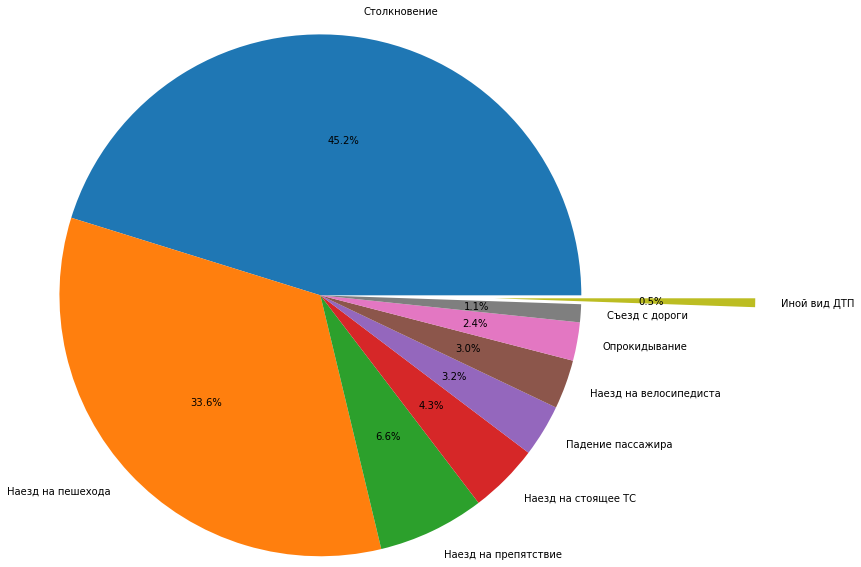

In [14]:
df1 = pd.DataFrame(df['properties.category'].value_counts().reset_index())
explode = (0, 0, 0, 0,0,0,0,0,2)
colors = ( "cyan", "orange", "red") 
pyplot.pie(data=df1,x='properties.category',labels='index', autopct='%.1f%%', radius=3, explode = explode)

In [15]:
x1 = df['properties.participants_count'].sum()
x2 = df['properties.injured_count'].sum()
x3 = df['properties.dead_count'].sum()

In [16]:
x4 = x1 - (x2+x3) 

In [17]:
x4

132245

In [18]:
import numpy as np

In [19]:
y = np.array([x4, x2, x3])
mylabels = ["кол-во не пострадавших участников ДТП", "кол-во раненых в ДТП", "кол-во погибших в ДТП"]

([<matplotlib.patches.Wedge at 0x25c77d1c220>,
 [Text(0.05937594855752962, 1.098396329533604, 'кол-во не пострадавших участников ДТП'),
  Text(-0.1953034666527008, -1.0825232357383547, 'кол-во раненых в ДТП'),
  Text(2.0837482321624696, -0.26075525873849914, 'кол-во погибших в ДТП')],
 [Text(0.03238688103137979, 0.5991252706546931, '48.3%'),
  Text(-0.10652916362874587, -0.590467219493648, '47.8%'),
  Text(1.587617700695215, -0.19867067332457075, '4.0%')])

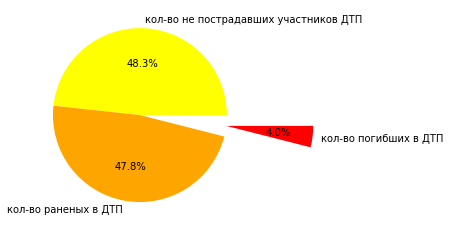

In [20]:
explode = (0, 0, 1)
colors = ( "yellow", "orange", "red") 
pyplot.pie(y, labels = mylabels, colors=colors, explode = explode, autopct='%.1f%%')

In [21]:
df.loc[0]['properties.vehicles']

"[{'year': 2016, 'brand': 'HYUNDAI', 'color': 'Желтый', 'model': 'Solaris', 'category': 'Прочие легковые автомобили', 'participants': [{'role': 'Водитель', 'gender': 'Мужской', 'violations': ['Нарушение правил проезда пешеходного перехода', 'Другие нарушения ПДД водителем'], 'health_status': 'Не пострадал', 'years_of_driving_experience': 6}]}]"

In [22]:
violations = ['Несоответствие скорости конкретным условиям движения',
              'Отказ водителя от прохождения медицинского освидетельствования на состояние опьянения',
              'Нарушение требований линий разметки',
              'Нарушение правил расположения ТС на проезжей части',
              'Неправильный выбор дистанции',
              'Нарушение требований сигналов светофора']